In [40]:
# Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries for Classification and building Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


# Project Specific Libraries

import librosa
import librosa.display
import IPython.display as ipd

In [41]:
df = pd.read_csv("../UrbanSound8K/metadata/UrbanSound8KFix.csv")

'''We will extract classes from this metadata.'''

df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100263-2-0-117.wav,100263,58.5,62.5,1,5,2,children_playing
1,100263-2-0-121.wav,100263,60.5,64.5,1,5,2,children_playing
2,100263-2-0-126.wav,100263,63.0,67.0,1,5,2,children_playing
3,100263-2-0-137.wav,100263,68.5,72.5,1,5,2,children_playing
4,100263-2-0-143.wav,100263,71.5,75.5,1,5,2,children_playing


In [42]:
class_name = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

In [43]:


df['class'].value_counts()



class
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
dog_bark             999
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

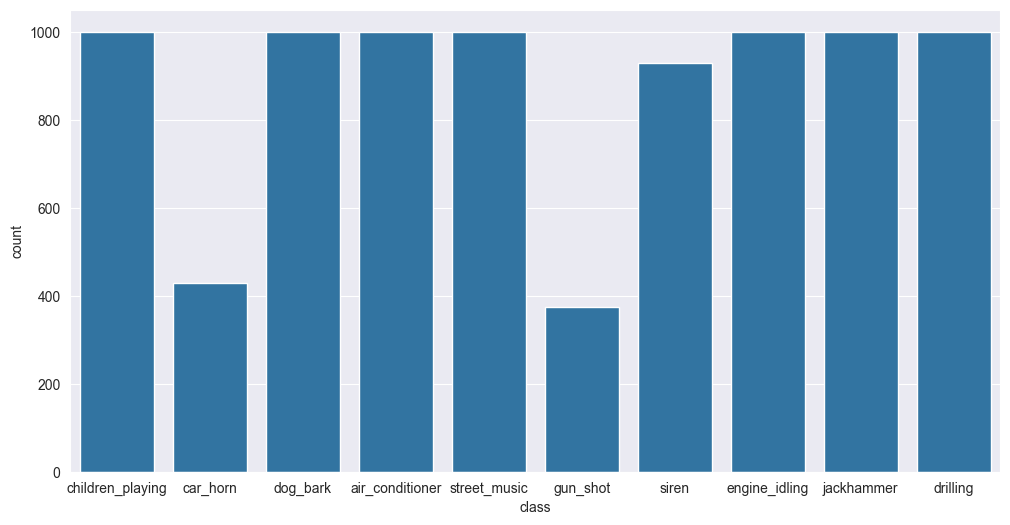

In [44]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="class", data=df)
plt.show()


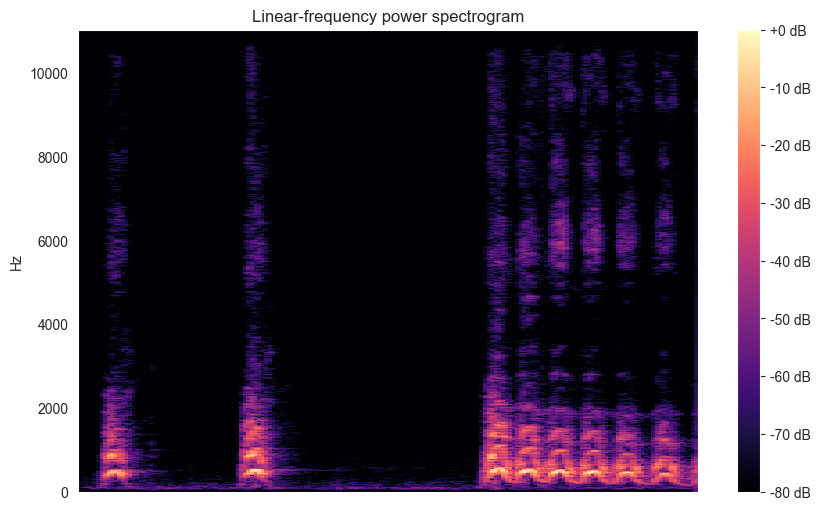

In [45]:


audio_file_path='../UrbanSound8K/audio/fold1/101415-3-0-2.wav'

data, sr = librosa.load(audio_file_path)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

ipd.Audio(audio_file_path)



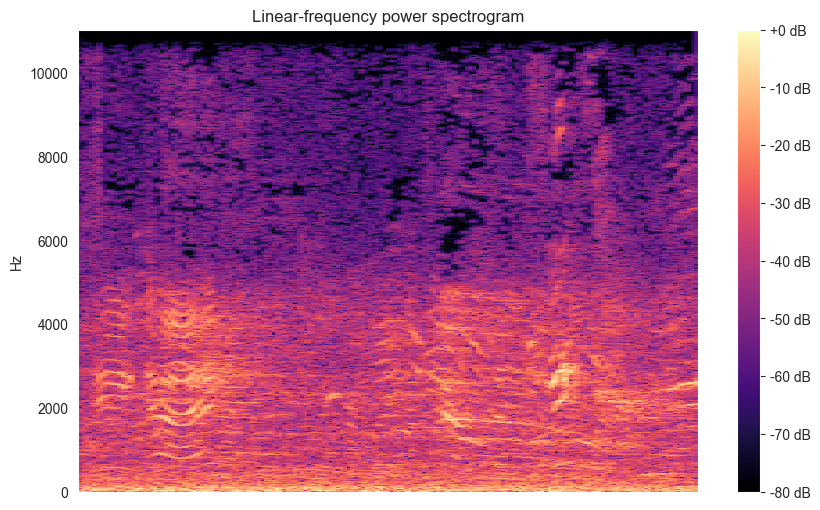

In [46]:
audio_file_path = '../UrbanSound8K/audio/fold5/100263-2-0-117.wav'

data, sr = librosa.load(audio_file_path)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

ipd.Audio(audio_file_path)

In [47]:
data, sr = librosa.load('../UrbanSound8K/audio/fold5/100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y = data, sr = sr)
arr.shape

(128, 14)

In [48]:
features = []
labels = []

def parser():
    for i in range(df.shape[0]):
        file_name = '../UrbanSound8K/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        data, sr = librosa.load(file_name, res_type='kaiser_fast')
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)
        features.append(mels)
        labels.append(df["classID"][i])

    return features, labels

In [49]:
x, y = parser()

C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [50]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

(8731, 128)
(8731,)


In [51]:
print(X.dtype)
print(Y.dtype)

float32
int64


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [53]:
forest = RandomForestClassifier()

# fit classifier to training set
forest.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
forest_pred = forest.predict(X_test)

In [55]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       259
           1       1.00      0.66      0.80       103
           2       0.70      0.79      0.74       233
           3       0.85      0.78      0.81       249
           4       0.88      0.87      0.88       236
           5       0.94      0.94      0.94       251
           6       0.90      0.73      0.80        95
           7       0.89      0.95      0.92       276
           8       0.87      0.93      0.90       224
           9       0.77      0.76      0.77       257

    accuracy                           0.86      2183
   macro avg       0.87      0.84      0.85      2183
weighted avg       0.86      0.86      0.86      2183


In [57]:
confusion_matrix(y_test, forest_pred)

array([[248,   0,   1,   0,   2,   2,   0,   3,   0,   3],
       [  2,  68,   5,   4,   5,   2,   3,   3,   1,  10],
       [  8,   0, 183,  11,   3,   4,   0,   1,   9,  14],
       [  7,   0,  19, 193,   4,   2,   0,   1,   9,  14],
       [  0,   0,   7,   3, 206,   0,   1,  12,   1,   6],
       [  0,   0,   5,   0,   0, 237,   1,   1,   4,   3],
       [  3,   0,   5,   5,   4,   0,  69,   7,   0,   2],
       [  2,   0,   0,   0,   7,   0,   0, 263,   0,   4],
       [  0,   0,   7,   6,   0,   0,   0,   0, 208,   3],
       [  9,   0,  28,   4,   2,   6,   3,   3,   6, 196]], dtype=int64)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state = 1)

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)

print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       404
           1       0.98      0.65      0.78       177
           2       0.71      0.75      0.73       392
           3       0.81      0.77      0.79       388
           4       0.86      0.86      0.86       410
           5       0.91      0.95      0.93       393
           6       0.93      0.67      0.78       147
           7       0.88      0.94      0.91       436
           8       0.88      0.92      0.90       353
           9       0.71      0.75      0.73       393

    accuracy                           0.84      3493
   macro avg       0.86      0.82      0.83      3493
weighted avg       0.85      0.84      0.84      3493


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)

print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       307
           1       1.00      0.67      0.81       132
           2       0.72      0.78      0.75       282
           3       0.84      0.77      0.81       287
           4       0.87      0.85      0.86       296
           5       0.91      0.94      0.93       306
           6       0.90      0.73      0.81       113
           7       0.89      0.95      0.92       326
           8       0.87      0.94      0.90       272
           9       0.75      0.75      0.75       299

    accuracy                           0.85      2620
   macro avg       0.87      0.84      0.85      2620
weighted avg       0.86      0.85      0.85      2620


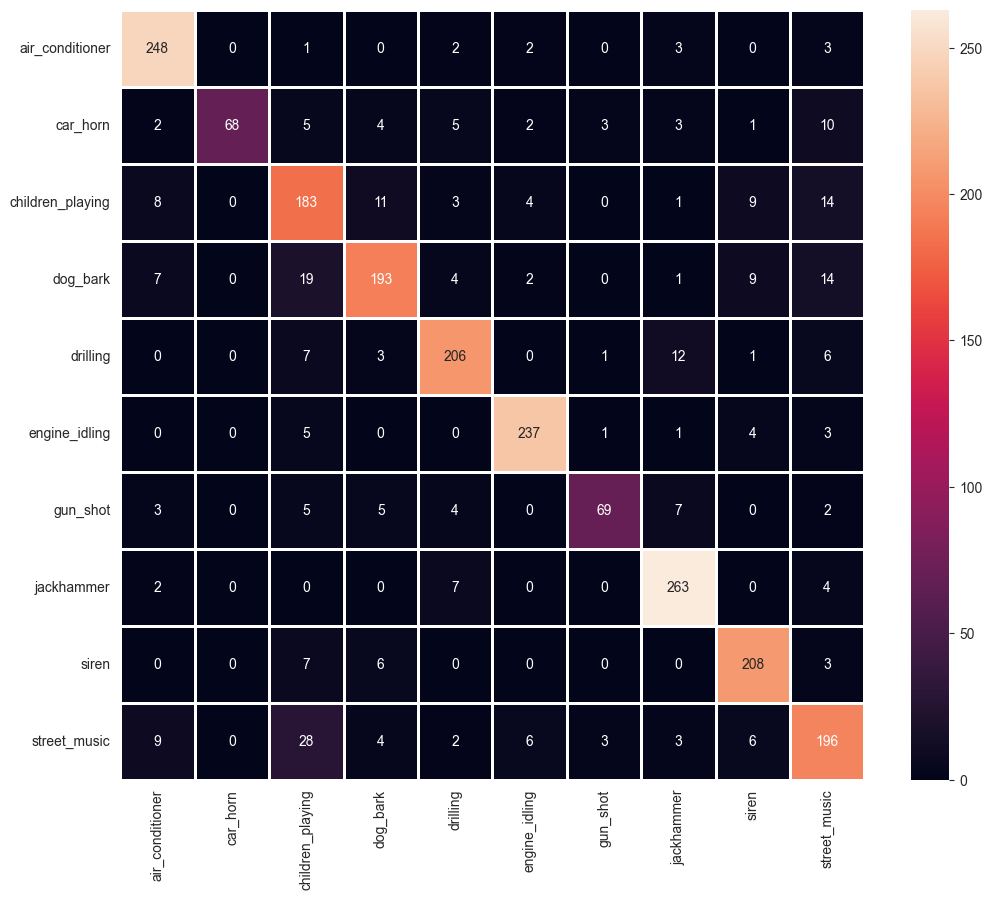

In [58]:
# Ploting Confusion Matrix
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, forest_pred),
            annot = True, linewidths = 2, fmt="d",
            xticklabels = class_name,
            yticklabels = class_name)
plt.show()

In [59]:


nb = GaussianNB()

# fit classifier to training set
nb.fit(X_train, y_train)

# make predictions on test set
nb_probas = nb.predict_proba(X_test)



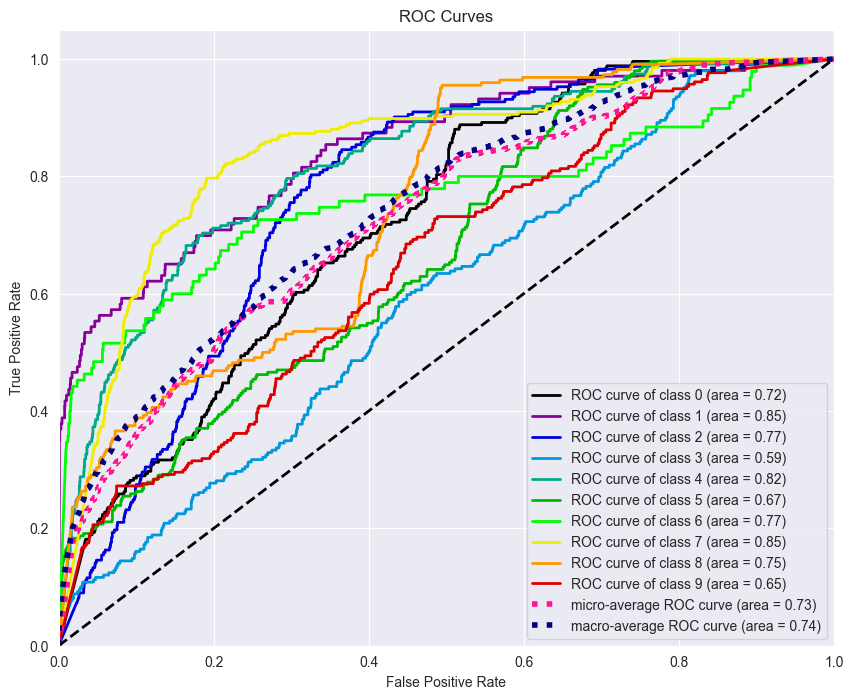

In [60]:


# AUC Curve
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, nb_probas, figsize = (10, 8))
plt.show()



In [61]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [63]:
from sklearn.metrics import accuracy_score

svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with rbf kernel and C=1000.0 : 0.5992


In [64]:


'''Confusion matrix'''

confusion_matrix(y_test, y_pred)



array([[146,   5,  74,   2,   2,  14,   1,   1,   0,  14],
       [  2,  60,  17,  11,   4,   4,   0,   0,   1,   4],
       [  9,   1, 186,  13,   5,   7,   0,   2,   4,   6],
       [  6,   3,  86, 120,   2,   2,   0,   0,  17,  13],
       [  3,   3,  33,  26, 141,   4,   3,  18,   2,   3],
       [  7,   0,  63,  11,   1, 168,   0,   0,   1,   0],
       [  0,   1,  18,   5,   7,   1,  52,   8,   1,   2],
       [ 12,   0,  10,   1,  18,   4,   2, 219,   2,   8],
       [  4,   0,  96,  19,   1,   8,   0,   3,  92,   1],
       [ 27,   4,  67,  11,   7,   8,   2,   4,   3, 124]], dtype=int64)

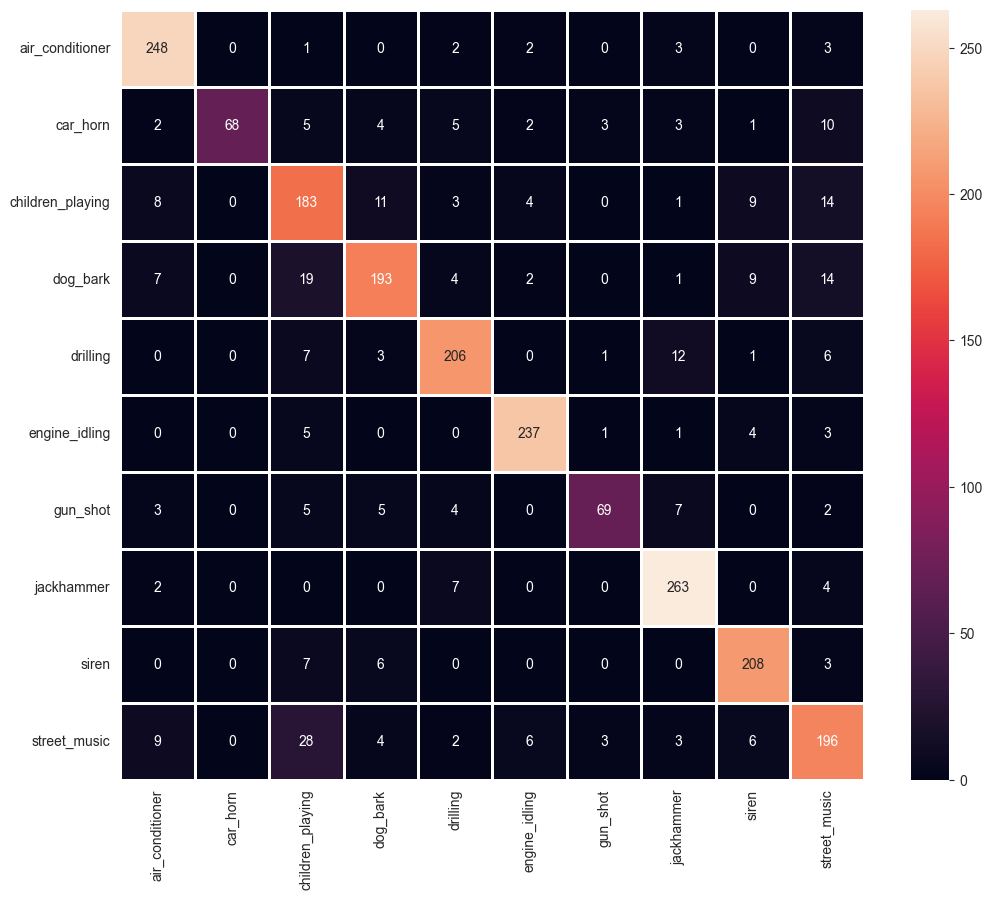

In [66]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, forest_pred),
            annot = True, linewidths = 2, fmt="d",
            xticklabels = class_name,
            yticklabels = class_name)
plt.show()

In [67]:


print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.68      0.56      0.61       259
           1       0.78      0.58      0.67       103
           2       0.29      0.80      0.42       233
           3       0.55      0.48      0.51       249
           4       0.75      0.60      0.67       236
           5       0.76      0.67      0.71       251
           6       0.87      0.55      0.67        95
           7       0.86      0.79      0.82       276
           8       0.75      0.41      0.53       224
           9       0.71      0.48      0.57       257

    accuracy                           0.60      2183
   macro avg       0.70      0.59      0.62      2183
weighted avg       0.69      0.60      0.62      2183
